In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

In [2]:
df = pd.read_csv('Sorghum.data.csv')
print(df.shape)
df.describe()

(1200, 332)


,740,741,742,743,744,745,746,747,748,749,...,1061,1062,1063,1064,1065,1066,1067,1068,1069,1070
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,...,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,1.615311,1.615358,1.615364,1.615469,1.615742,1.616217,1.616822,1.617500,1.618164,1.618746,...,1.732780,1.732817,1.731917,1.730594,1.729484,1.728516,1.728721,1.729712,1.730910,1.731593
std,0.068293,0.068294,0.068297,0.068287,0.068257,0.068204,0.068142,0.068082,0.068033,0.067994,...,0.053045,0.053228,0.053172,0.052946,0.052725,0.052490,0.052609,0.053086,0.053788,0.054312
min,1.468954,1.469210,1.469254,1.469459,1.469966,1.470832,1.471834,1.472807,1.473594,1.474135,...,1.621015,1.620887,1.620136,1.619136,1.618261,1.617626,1.617336,1.616960,1.616323,1.615533
25%,1.547876,1.547897,1.547876,1.548120,1.548768,1.549292,1.549858,1.550620,1.551457,1.552251,...,1.691107,1.690379,1.689496,1.688660,1.688215,1.686961,1.687218,1.687901,1.688967,1.689142
50%,1.599222,1.598992,1.598637,1.598435,1.598456,1.598785,1.599355,1.600049,1.600716,1.601248,...,1.716882,1.717468,1.716594,1.714821,1.713058,1.711590,1.711572,1.713451,1.715692,1.717214
75%,1.672791,1.672175,1.671846,1.671473,1.671769,1.672541,1.673234,1.673853,1.674445,1.675040,...,1.780241,1.780002,1.779050,1.777880,1.776396,1.774930,1.774930,1.776141,1.779029,1.780122
max,1.731532,1.731063,1.731853,1.732675,1.733417,1.734014,1.734535,1.734994,1.735450,1.735934,...,1.836458,1.837473,1.836513,1.834345,1.832236,1.830105,1.830620,1.833313,1.836777,1.838862


In [3]:
df = df.iloc[0:500,:]

In [5]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df.iloc[:, 0] = labelencoder.fit_transform(df.iloc[:, 0])
df['Predictor'].unique()
#df.head()

array([6, 8, 7, 9, 3, 4, 2, 1, 0, 5])

In [12]:
X = df.iloc[:,1:332].values
y = df.iloc[:, 0].values

In [13]:
X

array([[1.57888802, 1.57860538, 1.57835766, ..., 1.71292643, 1.71618827,
        1.71815724],
       [1.72212252, 1.72202257, 1.72188634, ..., 1.82486587, 1.82830539,
        1.83037342],
       [1.53736635, 1.53755592, 1.53771201, ..., 1.69887134, 1.70213069,
        1.7041037 ],
       ...,
       [1.70362428, 1.70411129, 1.70430637, ..., 1.80770473, 1.81111098,
        1.81315884],
       [1.56893415, 1.56914363, 1.5691767 , ..., 1.70315837, 1.70639279,
        1.70834283],
       [1.65673074, 1.65724649, 1.65752398, ..., 1.7758079 , 1.77915837,
        1.7811733 ]])

In [14]:
y

array([6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 9, 9, 9, 9,
       9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
       9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
       9, 9, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2,

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)


In [19]:
from sklearn.svm import SVC
model =SVC()
print(model)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)


In [22]:
from sklearn import preprocessing
from sklearn import utils

model = model.fit(X_train,y_train )
ms = model.score(X_train,y_train)
print("model score::",ms)

print("Confusion Matrix")
predicted = model.predict(X_test)
print(metrics.confusion_matrix(y_test , predicted))

model score:: 0.10666666666666667
Confusion Matrix
[[ 0  0  0  0  0  0  0  0 13  0]
 [ 0  0  0  0  0  0  0  0 13  0]
 [ 0  0  0  0  0  0  0  0 15  0]
 [ 0  0  0  0  0  0  0  0 15  0]
 [ 0  0  0  0  0  0  0  0 11  0]
 [ 0  0  0  0  0  0  0  0 11  0]
 [ 0  0  0  0  0  0  0  0 12  0]
 [ 0  0  0  0  0  0  0  0 12  0]
 [ 0  0  0  0  0  0  0  0 10  0]
 [ 0  0  0  0  0  0  0  0 13  0]]


/Users/jagruti/Desktop/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [23]:
model.fit(X_train,y_train)
ms = model.score(X_train,y_train)
print("model score::",ms)
pred = model.predict(X_test)

from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(y_test,pred))

/Users/jagruti/Desktop/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/jagruti/Desktop/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


model score:: 0.10666666666666667
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.00      0.00      0.00        13
           2       0.00      0.00      0.00        15
           3       0.00      0.00      0.00        15
           4       0.00      0.00      0.00        11
           5       0.00      0.00      0.00        11
           6       0.00      0.00      0.00        12
           7       0.00      0.00      0.00        12
           8       0.08      1.00      0.15        10
           9       0.00      0.00      0.00        13

   micro avg       0.08      0.08      0.08       125
   macro avg       0.01      0.10      0.01       125
weighted avg       0.01      0.08      0.01       125



/Users/jagruti/Desktop/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/jagruti/Desktop/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[[ 0  0  0  0  0  0  0  0 13  0]
 [ 0  0  0  0  0  0  0  0 13  0]
 [ 0  0  0  0  0  0  0  0 15  0]
 [ 0  0  0  0  0  0  0  0 15  0]
 [ 0  0  0  0  0  0  0  0 11  0]
 [ 0  0  0  0  0  0  0  0 11  0]
 [ 0  0  0  0  0  0  0  0 12  0]
 [ 0  0  0  0  0  0  0  0 12  0]
 [ 0  0  0  0  0  0  0  0 10  0]
 [ 0  0  0  0  0  0  0  0 13  0]]


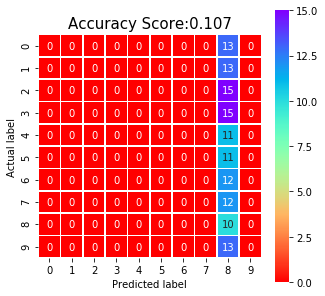

In [24]:
print(confusion_matrix(y_test,pred))
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

cm = confusion_matrix(y_test , pred)

plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.8, square = True, cmap = 'rainbow_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');

all_sample_title = 'Accuracy Score:{:0.3f}'.format(ms)
plt.title(all_sample_title, size = 15);